In [796]:
#Analyzing WorkPlaceSatisfactionSurveyData for our project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plot_likert

%matplotlib inline

In [797]:
# Open the data
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

## See if there's any missing values

In [798]:
df.isnull().sum()

number                     0
gender                     0
age                        0
family                     0
education                  1
years_of_service           2
salary                     0
sat_management             0
sat_colleques              1
sat_workingEnvironment     0
sat_salary                 0
sat_tasks                  0
healtcare                 35
holidayCabin              62
gym                       73
muscleCare                60
dtype: int64

## Investigating a couple categorical/qualitative variables and generating frequency tables for them (Family, Education)

In [799]:
df_education=pd.crosstab(df['education'], 'Count')
df_education.index=['Primary School', 'Secondary School', 'Bachelor Level', 'Master Level']
df_education['%'] = df_education['Count'] / df_education['Count'].sum() * 100
df_education.columns.name=''
df_education.loc['Total'] = df_education[['Count', '%']].sum()
df_education['Count'] = df_education['Count'].astype(int)
df_education.round(decimals=1)

,Count,%
Primary School,27,33.3
Secondary School,30,37.0
Bachelor Level,22,27.2
Master Level,2,2.5
Total,81,100.0


In [800]:
df_yearsofservice=pd.crosstab(df['years_of_service'], 'Count')
df_yearsofservice

bins = [0, 10, 20, 30, 40]
df['yearsofservice_class'] = pd.cut(df['years_of_service'], bins = bins)

In [801]:
df_yearsofservice = pd.crosstab(df['yearsofservice_class'], 'Count')
df_yearsofservice.columns.name = ''
n = df_yearsofservice['Count'].sum()
df_yearsofservice['%'] = df_yearsofservice / n * 100
df_yearsofservice.loc['Total'] = df_yearsofservice[['Count', '%']].sum()
df_yearsofservice['Count'] = df_yearsofservice['Count'].astype(int)
df_yearsofservice.round(decimals=1)

,Count,%
yearsofservice_class,,
"(0, 10]",34,44.7
"(10, 20]",26,34.2
"(20, 30]",14,18.4
"(30, 40]",2,2.6
Total,76,100.0


## Drawing graphs and histograms based on the frequency tables

<Axes: title={'center': 'Education Level'}, ylabel='Count'>

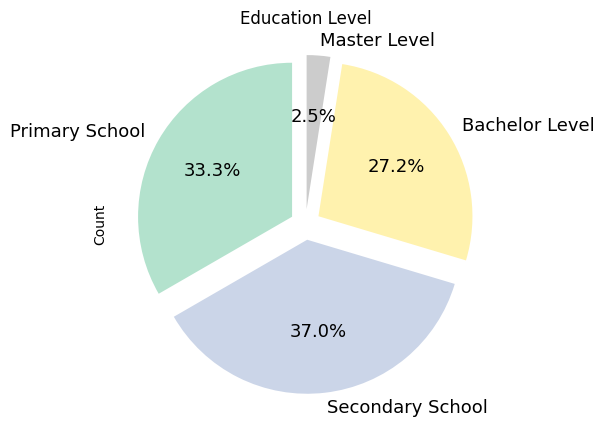

In [802]:
df_education_filtered = df_education[:-1]  #Removes the Total row

kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 13,
    explode    = (0.1, 0.1, 0.1, 0.1),
    figsize    = (6, 5), 
    autopct    = '%1.1f%%',
    title      = 'Education Level'
)

df_education_filtered['Count'].plot.pie(**kwargs)

Text(0, 0.5, 'Count, n=76')

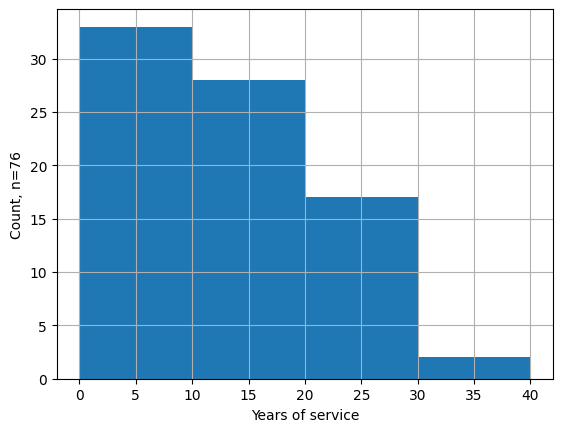

In [803]:
bins = [0, 10, 20, 30, 40]
df['years_of_service'].hist(bins = bins)

plt.xlabel('Years of service')
plt.ylabel('Count, n=' + str(n))

## Let's investigate satisfaction with management


In [804]:
df_satmanagement=pd.crosstab(df['sat_management'], 'Count')
df_satmanagement.index=['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
df_satmanagement.columns.name='Satisfaction with management'
n = df_satmanagement['Count'].sum()
df_satmanagement.loc['Total'] = df_satmanagement[['Count']].sum()
df_satmanagement

Satisfaction with management,Count
Very unsatisfied,7
Unsatisfied,16
Neutral,30
Satisfied,23
Very satisfied,6
Total,82


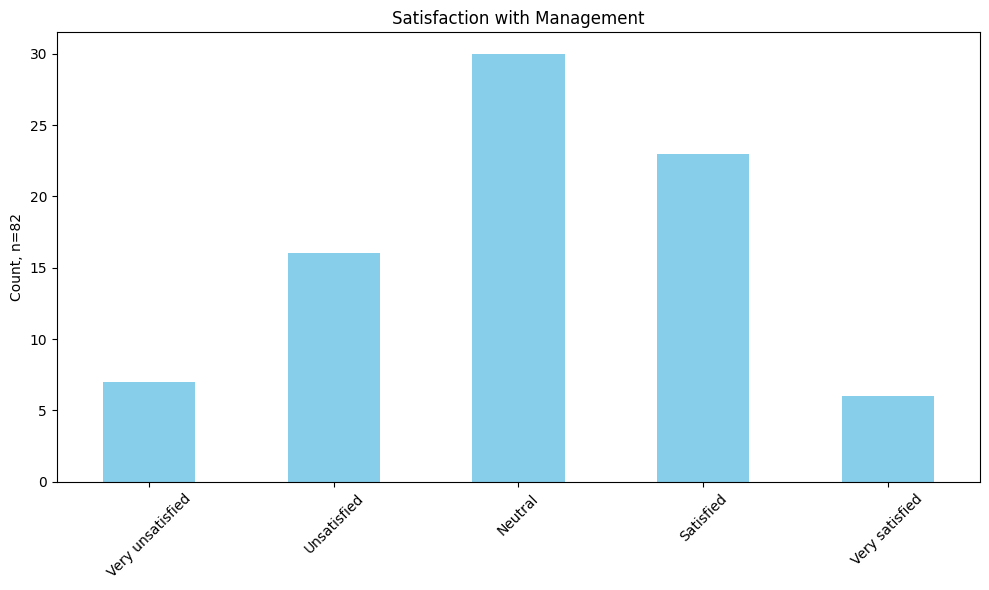

In [805]:
plt.figure(figsize=(10, 6))
df_satmanagement[:-1]['Count'].plot(kind='bar', color='skyblue')

plt.title('Satisfaction with Management')
plt.ylabel('Count, n=' + str(n))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Let's investige the employees satisfaction with their tasks

In [806]:
df_sattasks=pd.crosstab(df['sat_tasks'], 'Count')
df_sattasks.index=['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
df_sattasks.columns.name='Satisfaction with tasks'
n = df_sattasks['Count'].sum()
df_sattasks.loc['Total'] = df_sattasks[['Count']].sum()
df_sattasks

Satisfaction with tasks,Count
Very unsatisfied,5
Unsatisfied,15
Neutral,29
Satisfied,25
Very satisfied,8
Total,82


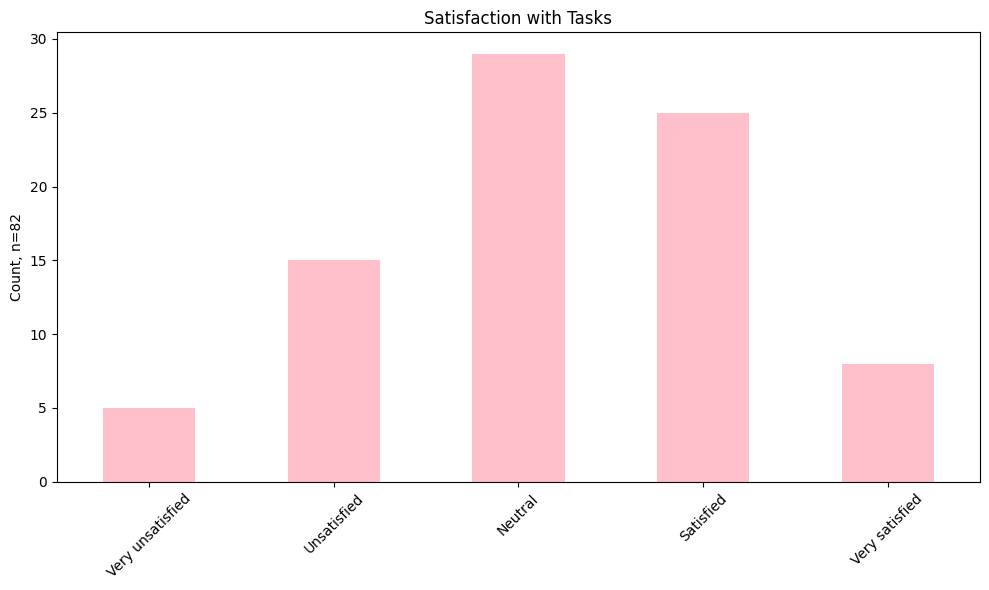

In [807]:
plt.figure(figsize=(10, 6))
df_sattasks[:-1]['Count'].plot(kind='bar', color='pink')

plt.title('Satisfaction with Tasks')
plt.ylabel('Count, n=' + str(n))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Let's look for dependencies between education and satisfaction with tasks

In [808]:
df_eduandtasks = pd.crosstab(df['education'], df['sat_tasks'])
df_eduandtasks.index = ['Primary School', 'Secondary School', 'Bachelor Level', 'Master Level']
df_eduandtasks.columns = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
df_eduandtasks = df_eduandtasks.round(0).astype(int)
df_eduandtasks

,Very unsatisfied,Unsatisfied,Neutral,Satisfied,Very Satisfied
Primary School,3,3,13,6,2
Secondary School,1,8,10,7,4
Bachelor Level,1,2,6,12,1
Master Level,0,1,0,0,1


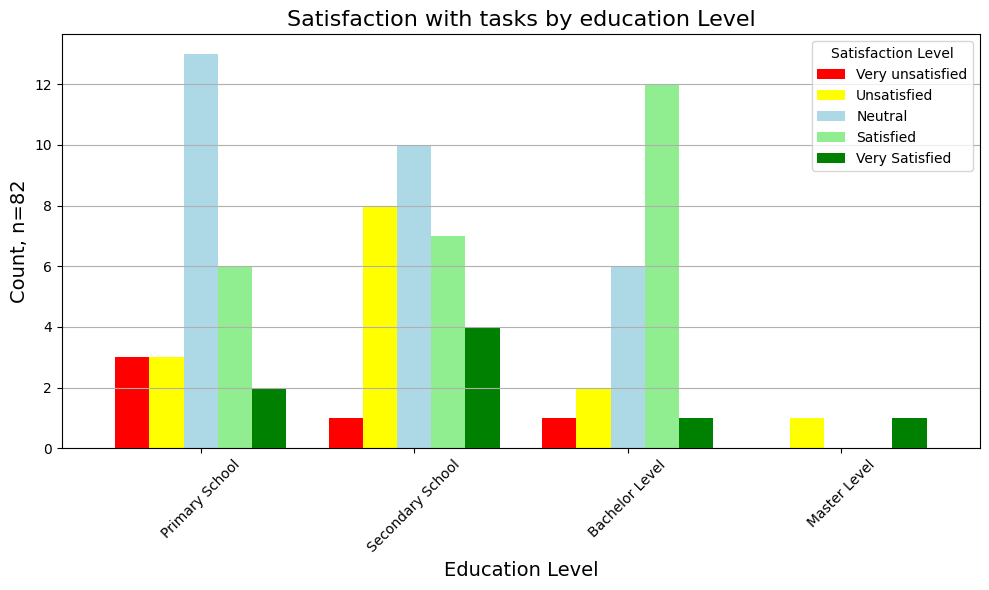

In [809]:
colors=['red', 'yellow', 'lightblue', 'lightgreen', 'green']
df_eduandtasks.plot(kind='bar', figsize=(10, 6), width=0.8, color=colors)

plt.title('Satisfaction with tasks by education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Count, n=' + str(n), fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Satisfaction Level')
plt.grid(axis='y')


plt.tight_layout()
plt.show()

## Let's look for dependencies between education and satisfaction with management

In [810]:
df_eduandmanag = pd.crosstab(df['education'], df['sat_management'])
df_eduandmanag.index = ['Primary School', 'Secondary School', 'Bachelor Level', 'Master Level']
df_eduandmanag.columns = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
df_eduandmanag = df_eduandmanag.round(0).astype(int)
df_eduandmanag

,Very unsatisfied,Unsatisfied,Neutral,Satisfied,Very Satisfied
Primary School,5,3,10,6,3
Secondary School,2,8,11,8,1
Bachelor Level,0,5,8,8,1
Master Level,0,0,1,0,1


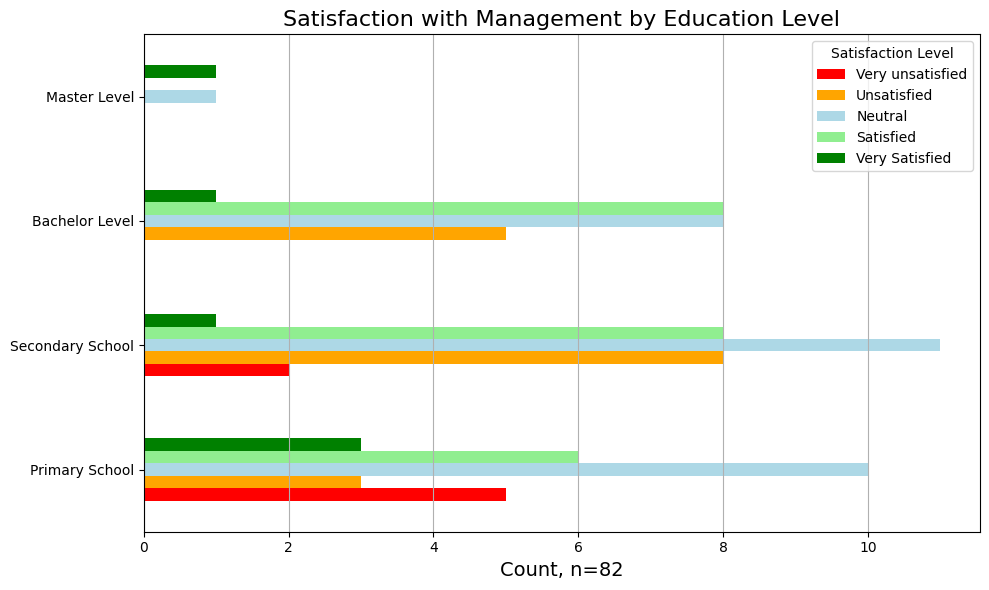

In [811]:
colors = ['red', 'orange', 'lightblue', 'lightgreen', 'green']

# Plotting Horizontal Bar Chart
df_eduandmanag.plot(kind='barh', figsize=(10, 6), color=colors)

# Add titles and labels
plt.title('Satisfaction with Management by Education Level', fontsize=16)
plt.xlabel('Count, n=' + str(n), fontsize=14)  # Ensure 'n' is defined
plt.legend(title='Satisfaction Level')
plt.grid(axis='x')

# Show the plot
plt.tight_layout()
plt.show()

## Let's look for dependencies between years of servive and satisfaction with management

In [812]:
df_yosandmanag = pd.crosstab(df['yearsofservice_class'], df['sat_management'])

df_yosandmanag.index = ['(0-10]', '(10-20]', '(20-30]', '(30-40]']
df_yosandmanag.columns = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']

df_yosandmanag = df_yosandmanag.astype(int)

df_yosandmanag

,Very unsatisfied,Unsatisfied,Neutral,Satisfied,Very Satisfied
(0-10],5,6,11,9,3
(10-20],2,4,10,7,3
(20-30],0,2,8,4,0
(30-40],0,1,0,1,0
